# 4.3 Discrete linear time invariant systems

## 4.3.1 Discrete time transfer function

When we studied continuous time systems, we found a transfer function  
to describe the relationship between input signal, $X$, and output signal, $Y$  
![image1!](./images_s4/image_4_3_1.png)  
The transfer function can only be expressed in the frequency domain  
The counterpart to the transfer function in the time domain is convolution  

The same is true for discrete time systems  
We will find transfer functions that describe the relationship between input signal, $X$, and output signal, $Y$  
Discrete time transfer functions must be expressed using the complex normalized discrete time frequency, $z$  
![image2!](./images_s4/image_4_3_2.png)  
When solving a discrete time system, the same actions apply as for a continuous time system  
If you want to compute an output signal,
1. Find the transfer function, $H(z)$  
2. Find the z-transform of the input, $X(z)=\mathcal{Z}\left\{x[k]\right\}$  
3. Multiply the transfer function by the input to compute the output $Y(z)=H(z)X(z)$  
4. Find the inverse z-transform of the output for an indexed set of output points, $y[k]=\mathcal{Z}^{-1}\left\{Y(z)\right\}$    
  
Python Scipy has classes to handle discrete time systems, just as it did for continuous time systems  

## 4.3.2 Discrete time - linear time invariant systems

From our z-transform table, we have the transfer functions for an accumulator or a differencer  
Consider the accumulator transfer function  
![image3!](./images_s4/image_4_3_3.png)  
We enter the transfer function into Scipy as a numerator (polynomial of $z$),  
over a denominator (polynomial of $z$), just as we did for continuous time transfer functions  
  
If the input is a unit step, then the output should be a time shifted ramp  
Let's see if Scipy gives us that result  
A discrete linear time invariant system is entered in Scipy with the dlti method  
[dlti](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.html)  

TransferFunctionDiscrete(
array([1., 0.]),
array([ 1., -1.]),
dt: True
)


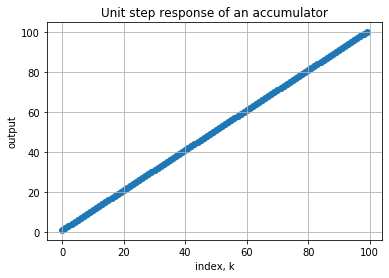

In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

num = [1, 0] # don't forget the zero
den = [1, -1]

H_z = sig.dlti(num, den)
print(H_z)

k, y = H_z.step()

plt.scatter(k, y)
plt.xlabel('index, k')
plt.ylabel('output')
plt.title('Unit step response of an accumulator')
plt.grid()

Scipy defaults to computing 100 points  
We can change the number of points, by entering a range for the index  
Scipy considers it's range as an amount of time rather than indices  
even though time does not play a role in the calculation  
  
Time only effects the array that is returned or entered that describes the time axis  
when we made our lti system, we did not specify a sampling period  
You can specify a sampling period by entering the parameter, $dt$  
If you do not specify, $dt$, then it will default to use indices (or a sampling period of 1 second)  
  
Notice in the printed out transfer function, that $dt$ is set to True  
If $dt$ is True, then the method returns index numbers  
If $dt$ has a value, such as $dt=0.1$, then the methods will return a time array  
  
We can specify indices or a time array other than the default by passing an array into the step response method  
[step](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dstep.html#scipy.signal.dstep)

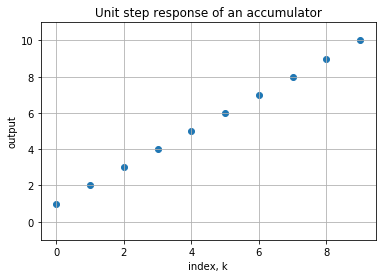

In [2]:
k = np.arange(0, 10, 1)
k, y = H_z.step(t=k)

plt.scatter(k, y)
plt.xlabel('index, k')
plt.ylabel('output')
plt.ylim([-1,11])
plt.title('Unit step response of an accumulator')
plt.grid()

Now, you can see the result is a time shifted discrete time unit ramp

## 4.3.3 Discrete time poles and zeros

Poles and zeros exist for discrete time systems, just as they do for continuous time systems  
Poles are the values of $z$ that cause the denominator of the transfer function to be zero  
the transfer function blows up to infinity, when $z$ equals a pole frequency  
Zeros are the values of $z$ that cause the numerator to be zero  
In a transfer function, the number of poles will equal the number of zeros,  
if you count all of the poles and zeros as $z\rightarrow\infty$  
  
It should be easy to see that an accumulator has a pole at $z=1$ (a DC pole) and a zero at $z=0$

In [3]:
print('poles =', H_z.poles)
print('zeros =', H_z.zeros)

poles = [1.]
zeros = [0.]


## 4.3.4 Creating a discrete time transfer function from continuous time

The question you should have at this point in the reading, is how do we create discrete time transfer functions?  
It was easy to derive transfer functions for continuous time systems  
  
We used relations between power conjugate variables, such as Newton's law, Hooke's law, or Stokes' law,  
and substituted them into conservations laws, such as D'Alembert's principle, all in the frequency domain  
  
Instead of defining discrete time physics, we will simply convert continuous time systems to discrete time systems  
And you already know how to make the conversion!  
  
$$z=e^{sT}$$  
Say, for example, you derived a continuous time transfer function of  
  
$$H(s)=\frac{10}{s+10}$$  
solve the relationship between the frequencies s and z, for s  
  
$$s=\frac{ln(z)}{T}$$  
and substitue  
  
$$H(z)=\frac{10}{\frac{ln(z)}{T}+10}$$  
That's it, we converted the continuous time transfer function to a discrete time transfer function  
unfortunatley, the result is non-linear and unsable  
  
In order to use the relationship between frequencies, s and z, we need to make a linear approximation for $z=e^{sT}$  
In our examples we will assume a sampling frequency of 20 sample/sec, or $T=0.05$[s]

### 4.3.4.1 Forward Euler or forward difference

The exponential function can be approximated by choosing a finite number of the terms  
from the infinite Taylor series expansion, specifically the Maclaurin series for exponentials  
[Taylor series](https://en.wikipedia.org/wiki/Taylor_series)  
  
$$e^{sT}=\sum_{n=0}^{\infty}\frac{(sT)^n}{n!}=1+sT+\frac{(sT)^2}{2!}+\frac{(sT)^3}{3!}+\frac{(sT)^4}{4!}+\cdots$$  
  
A first-order (linear) approximation from the Maclaurin series takes only the first two terms  
  
$$z=e^{sT}\approx1+sT$$  
solving for s  
  
$$s=\frac{z-1}{T}$$  
substitute this approximation into our example transfer function, $H(s)=\frac{10}{s+10}$  
  
$$H(z)=\frac{10}{\left(\frac{z-1}{T}\right)+10}$$  
write as a polynomial over a polynomial  
  
$$H(z)=\frac{10T}{z-1+10T}$$  
substitute our assumed sampling period, $T=0.05$[s]  
  
$$H(z)=\frac{0.5}{z-0.5}$$  
And there it is, we have a discrete time linear transfer function (polynomial of $z$ over a polynomial of $z$)  
that will approximate the continuous time transfer function, $H(s)=\frac{10}{s+10}$  

### 4.3.4.2 Backward Euler or backward difference

We can produce another first order approximation from the Maclaurin series expansion by noting that  
  
$$e^{sT}=\frac{1}{e^{-sT}}=\frac{1}{1-sT+\frac{(-sT)^2}{2!}+\frac{(-sT)^3}{3!}+\frac{(-sT)^4}{4!}+\cdots}$$  
the first order approximation is  
  
$$z=e^{sT}\approx\frac{1}{1-sT}$$  
solving for s  
  
$$s=\frac{z-1}{zT}$$  
substitute this approximation into our example transfer function, $H(s)=\frac{10}{s+10}$  
  
$$H(z)=\frac{10}{\left(\frac{z-1}{zT}\right)+10}$$  
write as a polynomial over a polynomial  
  
$$H(z)=\frac{10zT}{z-1+10zT}$$  
substitute our assumed sampling period, $T=0.05$[s]  
  
$$H(z)=\frac{0.5z}{1.5z-1}=\frac{0.33z}{z-0.67}$$

### 4.3.4.3 Bilinear or Tustin's method

The final first order approximation we can make from the Maclaurin series starts by noting  
  
$$e^{sT}=\frac{e^{\frac{sT}{2}}}{e^{-\frac{sT}{2}}}=\frac{1+\frac{sT}{2}+\frac{(\frac{sT}{2})^2}{2!}+\frac{(\frac{sT}{2})^3}{3!}+\frac{(\frac{sT}{2})^4}{4!}+\cdots}{1-\frac{sT}{2}+\frac{(-\frac{sT}{2})^2}{2!}+\frac{(-\frac{sT}{2})^3}{3!}+\frac{(-\frac{sT}{2})^4}{4!}+\cdots}$$  
the first order approximation is  
  
$$z=e^{sT}\approx\frac{1+\frac{sT}{2}}{1-\frac{sT}{2}}=\frac{2+sT}{2-sT}$$  
solving for s  
  
$$s=\frac{2}{T}\frac{z-1}{z+1}$$  
substitute this approximation into our example transfer function, $H(s)=\frac{10}{s+10}$  
  
$$H(z)=\frac{10}{\left(\frac{2}{T}\frac{z-1}{z+1}\right)+10}$$  
write as a polynomial over a polynomial  
  
$$H(z)=\frac{10zT+10T}{2z-2+10zT+10T}$$  
substitute our assumed sampling period, $T=0.05$[s]  
  
$$H(z)=\frac{0.5z+0.5}{2z-2+0.5z+0.5}=\frac{0.5z+0.5}{2.5z-1.5}=\frac{0.2z+0.2}{z-0.6}$$

## 4.3.5 Creating discrete time transfer functions with Scipy

In summary, we learned three different ways to write a first order approximation for $z=e^{sT}$  
  
The results, when applied to our example continuous time transfer function $H(s)=\frac{10}{s+10}$ are  
  
$$H(z)=\frac{0.5}{z-0.5}\qquad or\qquad H(z)=\frac{0.33z}{z-0.67}\qquad or\qquad H(z)=\frac{0.2z+0.2}{z-0.6}$$  
so which one is right?  
  
They're all right!  
They are just different approximations of the same thing  
  
The code cell below shows you how to create the same discrete time transfer functions using Scipy  
[to_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lti.to_discrete.html#scipy.signal.lti.to_discrete)  
  
you must specify a sampling period for this method

In [4]:
# enter the continuous time transfer function and create a continuous time lti system
num = [10]
den = [1, 10]
H_s = sig.lti(num, den)

# you must specify a sample period
dt = 0.05

# sometimes you will get a badly conditioned coefficients warning from Scipy
# its just a warning not an error
H_z_fe = H_s.to_discrete(dt=dt, method='euler')
print('Forward Euler\n', H_z_fe)
H_z_be = H_s.to_discrete(dt=dt, method='backward_diff')
print('Backward Euler\n', H_z_be)
H_z_b = H_s.to_discrete(dt=dt, method='bilinear')
print('Bilinear\n', H_z_b)

Forward Euler
 TransferFunctionDiscrete(
array([0.5]),
array([ 1. , -0.5]),
dt: 0.05
)
Backward Euler
 TransferFunctionDiscrete(
array([3.33333333e-01, 5.55111512e-17]),
array([ 1.        , -0.66666667]),
dt: 0.05
)
Bilinear
 TransferFunctionDiscrete(
array([0.2, 0.2]),
array([ 1. , -0.6]),
dt: 0.05
)


C:\Apps-SU\Anaconda\lib\site-packages\scipy\signal\filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


## 4.3.6 Finding a discrete time output signal by hand

$$H(z)\equiv\frac{y(z)}{x(z)}\Rightarrow y(z)=H(z)x(z)$$
  
To find an output signal using the discrete time transfer function,  
we must find the z-transform of an input signal  
For our example input, let's choose a step function with a magnitude of 5, rather than the unit step  
The Scipy method, step(), only finds the solution for a unit step  
  
$$x[k]=[5, 5, 5, \cdots]$$  
this transforms to  
  
$$x(z)=\frac{5z}{z-1}$$  
to find an output, we need a transfer function  
we will choose the bilinear transfer function we found in the previous example  
  
$$H(z)=\frac{0.2z+0.2}{z-0.6}$$
from the transfer function  
  
$$y(z)=H(z)x(z)=\left(\frac{0.2z+0.2}{z-0.6}\right)\left(\frac{5z}{z-1}\right)$$  
  
$$y(z)=\frac{z^2+z}{(z-0.6)(z-1)}=\frac{z^2+z}{z^2-1.6z+0.6}$$  
to transform this signal back to the time (or indexed) domain we just look it up in the z-transform table  
unfortunately, this function is not in our table  
  
we need to perform partial fraction expansion  
but before we do, we need to divide the output signal, $y(z)$, by $z$  
  
> **always divide by $z$ before performing partial fraction expansion**  
  
write the output signal in its factored form and find the residues  
  
$$\frac{y(z)}{z}=\frac{z+1}{z^2-1.6z+0.6}=\frac{R_1}{z-0.6}+\frac{R_2}{z-1}$$  
as with continuous time systems, there are many ways to find the residues,  
but we will use Scipy  
[Residues](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.residue.html#scipy.signal.residue)

In [5]:
num = [1, 1]
den = [1, -1.6, 0.6]

r, p, k = sig.residue(num, den)
print('residues =', r)
print('poles =', p)
print('k=', k)

residues = [-4.  5.]
poles = [0.6 1. ]
k= []


After we multiply $z$ back to the other side, we see the output signal becomes  
  
$$y(z)=\frac{-4z}{z-0.6}+\frac{5z}{z-1}$$  
Now we can transform this back to the time (or indexed) domain simply by looking up the terms in the z-transform table  
  
$$y[k]=-4(0.6)^k+5u[k]$$  
If we want to convert this to an exponential, we will have to consider the sampling rate  
use  
  
$$e^{-\sigma T}=0.6\Rightarrow\sigma=10.2$$  
such that  
  
$$y[kT]=5-4e^{-10.2kT}\quad or\quad y(t)=5-4e^{-10.2t}\quad for\;t\geq0$$  
we know the continuous time system should have a natural frequency of  10[Np/s],  
but through the bilinear approximation, we see a natural frequency of 10.2[Np/s]  
  
Also notice, because of the discrete time bilinear approximation, the system starts at a value of 1.0, rather than 0.0  
if we used a smaller sample period, the approximation would get closer to the continuous time solution  

## 4.3.7 Finding an output signal with Scipy

The code cell below creates a dlti system for the output signal,  
and plots it for the first 10 time samples using the impulse method  
it then compares the result to the continuous time solution  

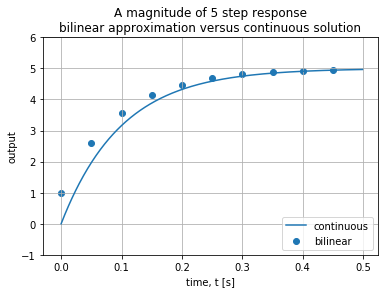

In [6]:
# create the solution for the bilinear approximation to a magnitude 5 step
t1 = np.arange(0, 0.5, 0.05) # space the points at the sampling period

# y(z) = (z^2+z)/(z^2-1.6z+0.6)
num = [1, 1, 0] # don't forget the zero
den = [1, -1.6, 0.6]

y_z = sig.dlti(num, den, dt=0.05)
t1, y_kT = y_z.impulse(t=t1)

# create the solution for the continuous solution to a magnitude 5 step
t2 = np.arange(0, 0.5, 0.001) # use more points for the continuous solution

# y(s) = 50/(s^2+10s)
num = [50]
den = [1, 10, 0]

y_s = sig.lti(num, den)
t2, y_t = y_s.impulse(T=t2)

plt.plot(t2, y_t)
plt.scatter(t1, y_kT)
plt.xlabel('time, t [s]')
plt.ylabel('output')
plt.ylim([-1,6])
plt.legend(['continuous', 'bilinear'], loc='lower right')
plt.title('A magnitude of 5 step response\nbilinear approximation versus continuous solution')
plt.grid()